In [34]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, eps):
    return (1/eps) * sum([(i+1)*x_i for x_i, i in zip(x, range(10))]) - sum([np.log(1-x_i**2) for x_i in x]) 
    
def df(x, eps):
    return np.array([(1/eps)*(i+1) + 2*x_i/(1-x_i**2)for x_i, i in zip(x, range(10))])

def ddf(x, eps):
    twice_diff = np.zeros((10, 10))
    for x_i, i in zip(x, range(10)):
        twice_diff[i, i] = (2+2*x_i**2)/(1-x_i**2)**2
    return twice_diff


def lambd(df, ddf, x, eps):
    return np.sqrt(df(x, eps).T@np.linalg.inv(ddf(x, eps))@df(x, eps))

def find_s(x, d, f, df, eps, beta=0.5, alpha = 0.01):
    s = 2
    while s > 0:
        if f(x+s*d, eps) < f(x, eps)+ alpha * s * df(x, eps).T @ d:
            break
        else:
            s = s*beta
    return s
        
    
    
    

At epsilon: 1 f(x) is -35.403225519724245
At epsilon: 0.1 f(x) is -508.6548096579975
At epsilon: 0.01 f(x) is -5435.760712581269
At epsilon: 0.005 f(x) is -10928.836563152647


C:\Users\97300\AppData\Local\Temp\ipykernel_44168\1231362001.py:4: RuntimeWarning: divide by zero encountered in log
  return (1/eps) * sum([(i+1)*x_i for x_i, i in zip(x, range(10))]) - sum([np.log(1-x_i**2) for x_i in x])
C:\Users\97300\AppData\Local\Temp\ipykernel_44168\1231362001.py:4: RuntimeWarning: invalid value encountered in log
  return (1/eps) * sum([(i+1)*x_i for x_i, i in zip(x, range(10))]) - sum([np.log(1-x_i**2) for x_i in x])


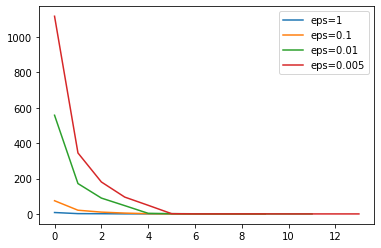

In [36]:
eps_lst = [1, 0.1, 0.01, 0.005]
lamda_lst = [[], [], [], []]
iteration_lst = []
for eps, i in zip(eps_lst, range(4)):

    x_0 = np.zeros(10)
    x = x_0
    iteration = 0
    converged = False
    
    while not converged:
        d = -np.linalg.inv(ddf(x, eps)) @ df(x, eps)
        s = find_s(x, d, f, df, eps)
        x = x+s*d
        lambd_val = lambd(df, ddf, x, eps)
        iteration += 1
        lamda_lst[i].append(lambd_val)
        if lambd_val <= 1e-6:
            print("At epsilon:", eps, "f(x) is", f(x, eps))
            break
    iteration_lst.append(iteration)


plt.plot(np.arange(iteration_lst[0]), lamda_lst[0], label = "eps=1") 

plt.plot(np.arange(iteration_lst[1]), lamda_lst[1], label = "eps=0.1") 

plt.plot(np.arange(iteration_lst[2]), lamda_lst[2], label = "eps=0.01") 

plt.plot(np.arange(iteration_lst[3]), lamda_lst[3], label = "eps=0.005") 
plt.legend()
plt.show()

    
